<a href="https://colab.research.google.com/github/Nckflannery/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# Mean Function
def my_mean(input):
  #If statement to handle inputting dataframes
  if isinstance(input, pd.DataFrame):
    list = input.values
  else:
    list = input
  sum=0
  for i in list:
    sum = sum + i
  mean = sum/len(list)
  return mean

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [48]:
# Using function
my_mean(sales)

3052.714285714286

In [49]:
# Using numpy
np.mean(sales)

3052.714285714286

In [0]:
# Variance function, including argument for degrees of freedom (default 1 for 
# sample), borrowing from function above
def variance(input, dof=1):
  if isinstance(input, pd.DataFrame):
    list = input.values
  else:
    list = input
  sum=0
  for i in list:
    sum = sum + i
  m = sum/len(list)
  sum_square = 0
  for i in input:
    sum_square = sum_square + (i-m)**2
  samp_var = sum_square/(len(input)-dof)
  return samp_var

In [57]:
# Using function
variance(sales)

214387.90476190473

In [52]:
# Using numpy
np.var(sales, ddof=1)

214387.90476190473

In [0]:
# Standard Deviation function, borrowing from variance function
def stand_dev(input, dof=1):
  if isinstance(input, pd.DataFrame):
    list = input.values
  else:
    list = input
  sum=0
  for i in list:
    sum = sum + i
  m = sum/len(list)
  sum_square = 0
  for i in input:
    sum_square = sum_square + (i-m)**2
  samp_var = sum_square/(len(input)-dof)
  st_dev = samp_var**.5
  return st_dev

In [58]:
# Using function
stand_dev(sales)

463.0204150595357

In [59]:
# Using numpy
np.std(sales, ddof=1)

463.0204150595357

In [0]:
# Let's output all our information in one line
def list_stats(input, dof=1):
  if isinstance(input, pd.DataFrame):
    list = input.values
  else:
    list = input
  sum=0
  for i in list:
    sum = sum + i
  m = sum/len(list)
  sum_square = 0
  for i in input:
    sum_square = sum_square + (i-m)**2
  samp_var = sum_square/(len(input)-dof)
  st_dev = samp_var**.5
  return (f'Mean: {round(m, 5)}, Variance: {round(samp_var, 5)}, Standard Deviation: {round(st_dev, 5)}')

In [78]:
list_stats(sales)

'Mean: 3052.71429, Variance: 214387.90476, Standard Deviation: 463.02042'

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers=[127, 80, 105, 92, 120, 115, 93]

In [70]:
np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# Write a function to find covariance
def covariance(input, input1, dof=1):
  # Check that inputs are same length
  length = len(input)
  length1 = len(input1)
  if length != length1:
    raise Exception('Lists must be of the same size!')
  else:
    # Need two counters
    sum = 0
    sum1 = 0
    # First find means
    for i in input:
      sum = sum + i
    for i in input1:
      sum1 = sum1 + i
    # Means for each
    m = sum/length
    m1 = sum1/length1
    # Sum
    exp_sum = 0
    # Use zip to 'combine' inputs to make easy for loop for summation
    inputs = zip(input,input1)
    for i, j in inputs:
      exp_sum = exp_sum + (i-m)*(j-m1)
    covar= exp_sum/(length-dof)
    return covar

In [104]:
covariance(customers, sales)

7604.357142857142

In [0]:
 # Steal functions from above to make a better, faster, stronger function
 def corr_coeff(input, input1, dof=1):
  length = len(input)
  length1 = len(input1)
  if length != length1:
    raise Exception('Lists must be of the same size!')
  else:
    sum = 0
    sum1 = 0
    for i in input:
      sum = sum + i
    for i in input1:
      sum1 = sum1 + i
    m = sum/length
    m1 = sum1/length1
    exp_sum = 0
    inputs = zip(input,input1)
    for i, j in inputs:
      exp_sum = exp_sum + (i-m)*(j-m1)
    covar= exp_sum/(length-dof)
    # From here, borrow from st_dev function but find for both inputs
    sum_square = 0
    sum_square1 = 0
    for i in input:
      sum_square = sum_square + (i-m)**2
    for i in input1:
      sum_square1 = sum_square1 + (i-m1)**2
    samp_var = sum_square/(length-dof)
    samp_var1 = sum_square1/(length1-dof)
    st_dev = samp_var**.5
    st_dev1 = samp_var1**.5
    cor_co= covar/(st_dev*st_dev1)
    return cor_co

In [107]:
# Using my function
corr_coeff(sales, customers)

0.9628339778148909

In [101]:
# Using numpy
np.corrcoef(sales, customers)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [108]:
!wget 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

--2019-09-24 21:02:51--  https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137509 (134K) [text/plain]
Saving to: ‘titanic_clean.csv’

titanic_clean.csv   100%[===================>] 134.29K  --.-KB/s    in 0.01s   

2019-09-24 21:02:51 (12.3 MB/s) - ‘titanic_clean.csv’ saved [137509/137509]



In [0]:
df = pd.read_csv('titanic_clean.csv')

In [114]:
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
df_numeric = df[['pclass','survived','age','sibsp','parch','ticket','fare',
                 'body','has_cabin_number']]

In [119]:
df_numeric.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [120]:
df_numeric.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-1, 2)

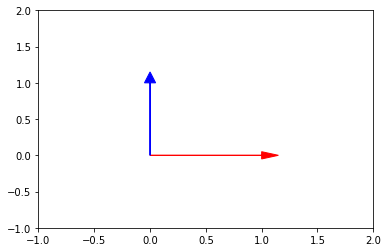

In [131]:
x = [1, 0]
y = [0, 1]

plt.arrow(0, 0, x[0], x[1], color='r', head_width=.1)
plt.arrow(0, 0, y[0], y[1], color='b', head_width=.1)
plt.xlim(-1, 2)
plt.ylim(-1, 2)

Perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

Since the dot product is not 0, they can not be orthogonal

In [0]:
a = [-5, 3, 7]
b = [6, -8, 2]

In [141]:
np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

###$||c||^2$

In [0]:
# Function to find norm
def norm(input):
  sum = 0
  for i in input:
    sum = sum + i**2
  norm = sum**.5
  return norm

In [156]:
norm(c)

25.787593916455254

In [157]:
norm_c = norm(c)
norm_c**2

665.0

###$c \cdot c$

In [158]:
np.dot(c,c)

665

### $c^T c$

In [161]:
cT = c.T
np.dot(cT, c)

665

They are all equal!

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$d=\begin{bmatrix}7\\2\end{bmatrix} = 7\begin{bmatrix}1\\0\end{bmatrix} + 12\begin{bmatrix}0\\1\end{bmatrix}=7\hat{i}+12\hat{j}$  
$e=\begin{bmatrix}2\\11\\-8\end{bmatrix}=2\begin{bmatrix}1\\0\\0\end{bmatrix}+11\begin{bmatrix}0\\1\\0\end{bmatrix}-8\begin{bmatrix}0\\0\\1\end{bmatrix}=2\hat{i}+11\hat{j}-8\hat{k}$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
f = np.array([4, 12, 11, 9, 2])
normf = norm(f)

In [163]:
unitf = f/normf
unitf

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

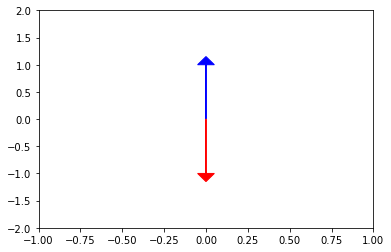

In [169]:
# Linearly dependent
plt.xlim(-1,1)
plt.ylim(-2,2)

plt.arrow(0,0,0,1,head_width=.1, color='b')
plt.arrow(0,0,0,-1,head_width=.1, color='r')
plt.show()

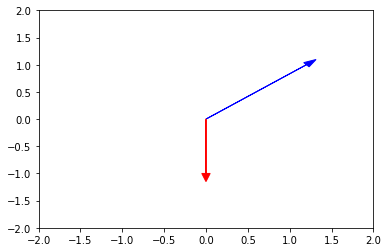

In [171]:
# Linearly independent
plt.xlim(-2,2)
plt.ylim(-2,2)

plt.arrow(0,0,1.2,1,head_width=.1, color='b')
plt.arrow(0,0,0,-1,head_width=.1, color='r')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

Since h and g are the same vector of different scale they are linearly dependent and their span would be $\mathbb{R}$

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

Since $l, m$ and $n$ are linearly independent (determinant of matrix = -20 $\neq$ 0) they span $\mathbb{R}^3$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



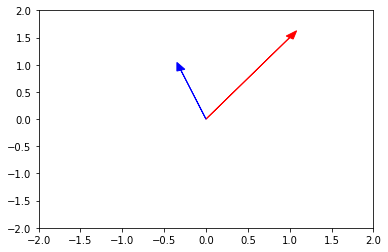

In [179]:
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.arrow(0,0,1,1.5,head_width=.1, color='r')
plt.arrow(0,0,-.3,.9,head_width=.1, color='b')
plt.show()

## 6.2 What does it mean to form a basis?

A basis of a vector space is a set of vectors that span the vector space and are linearly independent. So in the given example, since the vectors are linearly independent, we could scale them to fill the space $\mathbb{R}^2$

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

P is the inverse of the above matrix, which we know was rank 3, P is also rank 3. Using gaussian elimination we can also see that $P=\begin{bmatrix}1&2&3\\0&1&5\\0&0&1\end{bmatrix}$  
Since we have 3 rows with leading 1s we know P is rank 3

## 7.2 What does the rank of a matrix tell us?

The rank of the matrix tells us the span of the vector combinations, and whether or not the vectors are linearly dependent/independent.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# def proj(a, b):
#   dot = np.dot(a, b)
#   dot1 = np.dot(b, b)
#   proj = (dot/dot1)*b
#   return proj

In [0]:
v=np.array([1,3])
w=np.array([-1,2])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


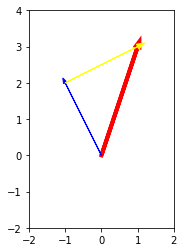

In [229]:
plt.xlim(-2,2)
plt.ylim(-2, 4)

x_minus_proj = v - w
plt.axes().set_aspect('equal')

plt.arrow(0,0,v[0],v[1],color='r', head_width=.1, linewidth=4)
plt.arrow(0,0,w[0],w[1],color='b', head_width=.1)
plt.arrow(w[0], w[1], x_minus_proj[0], x_minus_proj[1], head_width=.15, color = 'yellow')

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

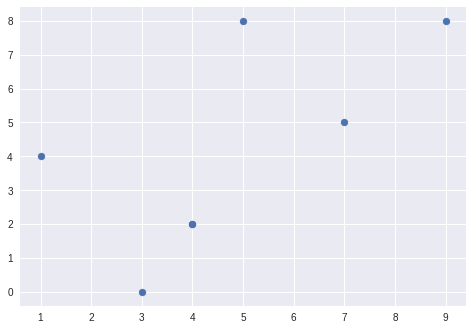

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()